In this notebook, we are going to perform ML analyses on Pokemon. 

# Import the Libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline

In [25]:
import seaborn as sns

# Machine Learning Libraries

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
from sklearn.pipeline import make_pipeline

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.metrics import confusion_matrix

In [6]:
from sklearn.metrics import roc_auc_score

In [7]:
from sklearn.model_selection import cross_val_score

In [8]:
from sklearn.metrics import make_scorer

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin

In [10]:
from sklearn.pipeline import make_union

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
from sklearn.preprocessing import Imputer

# Reading the Dataset

In [14]:
pokemon = pd.read_csv('./pokemon_alopez247.csv')

In [15]:
pokemon.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [16]:
pokemon.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [17]:
pokemon.dtypes

Number                int64
Name                 object
Type_1               object
Type_2               object
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary            bool
Color                object
hasGender              bool
Pr_Male             float64
Egg_Group_1          object
Egg_Group_2          object
hasMegaEvolution       bool
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style           object
dtype: object

# Checking for Null Values

In [19]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
Number              721 non-null int64
Name                721 non-null object
Type_1              721 non-null object
Type_2              350 non-null object
Total               721 non-null int64
HP                  721 non-null int64
Attack              721 non-null int64
Defense             721 non-null int64
Sp_Atk              721 non-null int64
Sp_Def              721 non-null int64
Speed               721 non-null int64
Generation          721 non-null int64
isLegendary         721 non-null bool
Color               721 non-null object
hasGender           721 non-null bool
Pr_Male             644 non-null float64
Egg_Group_1         721 non-null object
Egg_Group_2         191 non-null object
hasMegaEvolution    721 non-null bool
Height_m            721 non-null float64
Weight_kg           721 non-null float64
Catch_Rate          721 non-null int64
Body_Style          721 non-

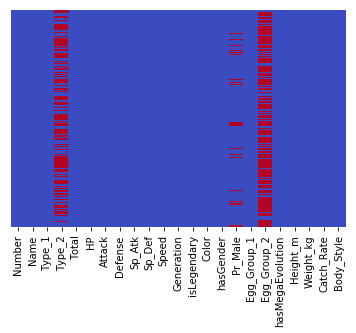

In [20]:
sns.heatmap(pokemon.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

Nothing major. Although we will take precaution.

# Change types of columns from int to float to avoid future warnings

In [21]:
for col in pokemon.columns:
    if pokemon[col].dtype == int:
        pokemon[col] = pokemon[col].astype(float)

# Predicting if Pokemon is Legendary or Not

In [22]:
pokemon['isLegendary'].value_counts()

False    675
True      46
Name: isLegendary, dtype: int64

# Splitting the Data

In [28]:
pokemon_train, pokemon_test = train_test_split(pokemon, test_size=0.2, random_state=42)

# Converting to Array

In [29]:
def get_arrays(pokemon):
    X = np.array(pokemon[['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def']])
    y = np.array(pokemon['isLegendary'])
    
    return X, y

X_train, y_train = get_arrays(pokemon_train)
X_test, y_test = get_arrays(pokemon_test)

X_train.shape, y_train.shape

((576, 5), (576,))

# Creating Pipeline

In [35]:
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

# Train and Predict

In [36]:
model = pipeline.fit(X_train, y_train)
model.predict(X_train)[:5]

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([False, False, False, False, False], dtype=bool)

# Validate Classifier

# Confusion Matrix

In [38]:
confusion_matrix(y_train, model.predict(X_train))

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[532,   6],
       [ 21,  17]], dtype=int64)

# AUC Score

In [39]:
roc_auc_score(y_train, model.predict(X_train))

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.71810800234787719

# Cross-Val Score

In [40]:
def cross_validate_auc(pipeline, X_train, y_train):
    results = cross_val_score(
        pipeline,
        X_train,
        y_train,
        scoring=make_scorer(roc_auc_score),
        cv=10,
    )

    return np.mean(results)

In [41]:
cross_validate_auc(pipeline, X_train, y_train)

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to f

0.71526030747728864

# Custom Transformers

In [42]:
class PandasSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, selected_columns):
        self.selected_columns = selected_columns
    
    def fit(self, pokemon, *args):
        return self

    def transform(self, pokemon):
        return np.array(pokemon[self.selected_columns])

In [43]:
pipeline = make_pipeline(
    PandasSelector(['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def']),
    StandardScaler(),
    LogisticRegression()
)

model = pipeline.fit(pokemon_train, y_train)
model.predict(pokemon_train)[:5]

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([False, False, False, False, False], dtype=bool)

# Complex Pipeline

In [44]:
pipeline_stats = make_pipeline(
    PandasSelector(['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def']),
    StandardScaler(),
)

pipeline_hasGender = make_pipeline(
    PandasSelector(['hasGender']),
)

pipeline = make_pipeline(
    make_union(
        pipeline_stats,
        pipeline_hasGender,
    ),
    LogisticRegression(),
)

cross_validate_auc(pipeline, pokemon_train, y_train)

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to f

0.85596610761705105

# Categorical Variables

In [45]:
class StringConverter(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.map = {} # column : string : int
    
    def fit(self, X, *args):
        for col in range(X.shape[1]):
            self.map[col] = {}
            idx = 1
            for row in range(X.shape[0]):
                s = X[row, col]
                if s not in self.map[col]:
                    self.map[col][s] = idx
                    idx += 1
        return self

    def transform(self, X):
        X_int = np.zeros(shape=X.shape)
        for col in range(X.shape[1]):
            for row in range(X.shape[0]):
                s = X[row, col]
                X_int[row, col] = self.map[col].get(s, 0)

        return X_int

In [46]:
pipeline_color = make_pipeline(
    PandasSelector(['Color']),
    StringConverter(),
    OneHotEncoder(),
)

pipeline = make_pipeline(
    make_union(
        pipeline_stats,
        pipeline_hasGender,
        pipeline_color,
    ),
    LogisticRegression(),
)

cross_validate_auc(pipeline, pokemon_train, y_train)

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to f

0.88420684835779184

# Missing Values Calculations

In [47]:
np.mean(pokemon_train['Pr_Male'].isnull())

0.1076388888888889

In [51]:
pipeline_PrMale = make_pipeline(
    PandasSelector(['Pr_Male']),
    Imputer(),
)

pipeline = make_pipeline(
    make_union(
        pipeline_stats,
        pipeline_hasGender,
        pipeline_color,
        pipeline_PrMale,
    ),
    LogisticRegression(),
)

cross_validate_auc(pipeline, pokemon_train, y_train)

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to f

0.87263277428371766

# Text Data

In [52]:
pipeline_name = make_pipeline(
    PandasSelector('Name'),
    TfidfVectorizer(
        analyzer='char',
        ngram_range=(1, 5),
        min_df=10,
    ),
)

pipeline = make_pipeline(
    make_union(
        pipeline_stats,
        pipeline_hasGender,
        pipeline_color,
        pipeline_PrMale,
        pipeline_name,
    ),
    LogisticRegression(),
)

cross_validate_auc(pipeline, pokemon_train, y_train)

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to f

0.88096610761705096

# Fine Tuning

In [53]:
parameters = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__class_weight': [None, 'balanced'],
}

grid = GridSearchCV(
    pipeline,
    parameters,
    scoring=make_scorer(roc_auc_score),
).fit(pokemon_train, y_train)

print('Best params: {}'.format(grid.best_params_))
print('Best AUC: {:.3f}'.format(grid.best_score_))

final_model = grid.best_estimator_

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to f

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to f

Best params: {'logisticregression__C': 0.1, 'logisticregression__class_weight': 'balanced'}
Best AUC: 0.972


C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Final Evaluation

In [54]:
roc_auc_score(y_test, final_model.predict(pokemon_test))

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.97445255474452552

# Save Model

In [55]:
from sklearn.externals import joblib

joblib.dump(final_model, 'final_model.pkl');

In [56]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [57]:
loaded_model = joblib.load('final_model.pkl')
roc_auc_score(y_test, final_model.predict(pokemon_test))

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.97445255474452552